In [3]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset (ensure you have a CSV or a dataframe with sentences and categories)
# Assuming the dataset has columns 'sentence' and 'category'
# For this example, you will replace the path with your own dataset file path
# duplicate = pd.read_csv('Final_collected_data/merged_dhia.csv', sep=';')
data = pd.read_csv('Final_collected_data/merged_dhia.csv', sep=',', encoding='utf-8')

In [5]:
#duplicate

In [6]:
#unique = duplicate.drop_duplicates(subset='Line')
#unique.to_csv('unique_lines.csv', index=False)

In [7]:
# Display the first few rows of the dataset to understand its structure
data.head()

,Line,Category,processed_quotes
0,اصبر قليلاً فبعد العسر تيسير وكلّ أمرٍ له وق...,الصبر,"['صبر', 'قلل', 'بعد', 'عسر', 'يسر', 'وكل', 'أم..."
1,الأمور التي تعرفها تعادل في حجمها حفنة الرمل...,التواضع,"['امر', 'عرف', 'عدل', 'حجم', 'حفن', 'رمل', 'يد..."
2,البشر لن يجدوا أبر بهم ولا احنى عليهم من الل...,الرحمة,"['بشر', 'يجد', 'أبر', 'احن', 'علي', 'الل', 'عز..."
3,الحسد أغبى الرذائل إطلاقا فإنه لا يعود على ص...,الحسد,"['حسد', 'اغب', 'رذيل', 'طلق', 'فإن', 'يعد', 'ع..."
4,الصّبر أفضل علاج للحزن. ( بلوطس ),الصبر,"['صبر', 'فضل', 'علج', 'حزن', 'وطس']"


In [8]:
# Split the data into features (X) and target (y)
X = data['Line']
y = data['Category']

In [30]:
positive_values = [
    "الإعراض عن الجاهلين",
    "الاعتدال والوسطيّة",
    "الإصلاح",
    "الإحسان إلى الغير",
    "الاحترام والتوقير",
    "الألفة",
    "الأمانة",
    "الإنصات",
    "الإيثار",
    "البِر",
    "البَشاشة",
    "التأنّي الأناة",
    "التثبّت",
    "التضحية",
    "التعاون",
    "التغافل",
    "التفاؤل",
    "التواصي بالخير",
    "التواضع",
    "التودّد",
    "الحذر واليقظة",
    "حسن السمت",
    "حسن الظن",
    "الحيطة",
    "الجود والكَرَم والسخاء والبذل",
    "الجدّية والحزم",
    "الحياء",
    "الحلم",
    "الحكمة",
    "حفظ اللسان",
    "حسن العشرة والجوار",
    "السكينة الستر",
    "الزهد فيما في أيدي الناس",
    "الرحمة",
    "الرفق",
    "سلامة الصدر",
    "السماحة",
    "الشجاعة",
    "الشفقة",
    "الشكر",
    "الشّهامة",
    "الصبر",
    "الصدق",
    "الصلة والتواصل",
    "الصمت",
    "العفو والصفح",
    "العفّة",
    "العزم والعزيمة وعلو الهمة",
    "العدل والإنصاف",
    "العزّة",
    "الغيرة",
    "الفراسة",
    "الفصاحة",
    "الفطنة والذكاء",
    "القناعة",
    "القوة",
    "كتمان السر",
    "كظم الغيظ",
    "المحبة",
    "المداواة",
    "المروءة",
    "المزاح",
    "المواساة",
    "النزاهة",
    "النشاط",
    "النصرة",
    "النصيحة",
    "النظافة",
    "الورع",
    "الوفاء",
    "الوقار والرزانة"
]
negative_values = [
    "الأثرة والأنانيّة",
    "الاختلاف والتنازع",
    "الإساءة",
    "الإسراف والتبذير",
    "الإطراء والمدح",
    "الافترا والبُهتان",
    "الإفراط",
    "إفشاء السر",
    "الانتقام",
    "البخل والشح",
    "التسرع والتهور والعجلة",
    "البطر",
    "البغض والكراهية",
    "التجسس",
    "التخاذل",
    "التعالي",
    "التعسير",
    "التعصّب",
    "التفريط",
    "التقليد والتبعية",
    "التنابز بالألقاب",
    "الثرثرة",
    "الجبن",
    "الجدال والمراء",
    "الجزع",
    "الجفاء",
    "الحسد",
    "الحقد",
    "الخبث",
    "الخداع",
    "الخذلان",
    "خلف الوعد",
    "الخيانة",
    "الدّياثة",
    "الذل",
    "سوء الجوار",
    "السفاهة والحمق",
    "السخرية والاستهزاء",
    "السب والشتم",
    "رفع الصوت",
    "الطمع",
    "الظلم",
    "سوء الظن",
    "الشراهة",
    "الشمتة",
    "العبوس",
    "العجب",
    "العدوان",
    "الغدر ونقض العهد",
    "الغش",
    "الفجور",
    "الفحش والبذاءة",
    "الغيبة",
    "الغِلظة والقسوة والفظاظة",
    "الغضب",
    "الكبر",
    "الكذب",
    "الكسل والفتور",
    "اللامبالاة",
    "اللؤم والخسّة والدناءة",
    "المداهاة",
    "المكر والكيد",
    "المن",
    "النفاق",
    "نكران الجميل",
    "اليأس والقنوط والإحباط",
    "الوهن",
    "الهمز واللمز",
    "الهجر",
    "النميمة"
]

In [27]:
num_categories = data['Category'].nunique()
print(f"Number of unique categories: {num_categories}")

Number of unique categories: 135


In [28]:
# Filter the data to only include categories that are in positive_values or negative_values
filtered_data = data[data['Category'].isin(positive_values + negative_values)]

# Update X and y with the filtered data
X = filtered_data['Line']
y = filtered_data['Category']

# Display the value counts of the filtered categories
filtered_data['Category'].value_counts()

NameError: name 'positive_values' is not defined

In [9]:
# Filter out categories with less than 2 occurrences
category_counts = data['Category'].value_counts()
filtered_data = data[data['Category'].isin(category_counts[category_counts >= 2].index)]

# Update X and y with the filtered data
X = filtered_data['Line']
y = filtered_data['Category']

# Display the value counts of the filtered categories
filtered_data['Category'].value_counts()
# Count the number of null lines in the filtered data
null_line_count = filtered_data['Line'].isnull().sum()
print(f"Number of null lines: {null_line_count}")

Number of null lines: 0


In [10]:
# Ensure the split is stratified to maintain equal distribution of categories
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# Convert the sentences into numerical format using TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features based on dataset size
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [12]:
# Train a Logistic Regression model
log_reg_model = LogisticRegression(max_iter=10000)
log_reg_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=10000)

In [13]:
# Predict the categories on the test set
y_pred = log_reg_model.predict(X_test_tfidf)

In [14]:
# Evaluate the model performance using classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                           precision    recall  f1-score   support

                   الحياء       0.00      0.00      0.00         1
                   الغيرة       0.00      0.00      0.00         6
               إفشاء السر       0.86      0.60      0.71        20
          الأخوة والصداقة       0.56      0.40      0.47        25
                   الألفة       0.00      0.00      0.00         7
                  الأمانة       0.65      0.59      0.62        34
                  الإخلاص       0.69      0.38      0.49        24
                  الإساءة       0.00      0.00      0.00         8
                  الإصلاح       1.00      0.83      0.91        12
      الإعراض عن الجاهلين       1.00      1.00      1.00       103
                  الإنصات       0.50      0.20      0.29        10
                  الإيثار       1.00      0.87      0.93        38
                 الاحترام       0.77      0.62      0.69        37
        الاعتدال والوسطية       0.97  

d:\Dhia\ING INFO 2\Semestre 1\Projet traitement de données\Project\data collection\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Dhia\ING INFO 2\Semestre 1\Projet traitement de données\Project\data collection\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Dhia\ING INFO 2\Semestre 1\Projet traitement de données\Project\data collection\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with

In [15]:
from matplotlib import font_manager

In [16]:
font_path = '../../arabic font/dejavu-sans/ttf/DejaVuSans.ttf'  # Adjust this for your system
font_prop = font_manager.FontProperties(fname=font_path)

In [17]:
import arabic_reshaper
from bidi.algorithm import get_display


In [18]:
# Confusion Matrix with Arabic labels
conf_matrix = confusion_matrix(y_test, y_pred)

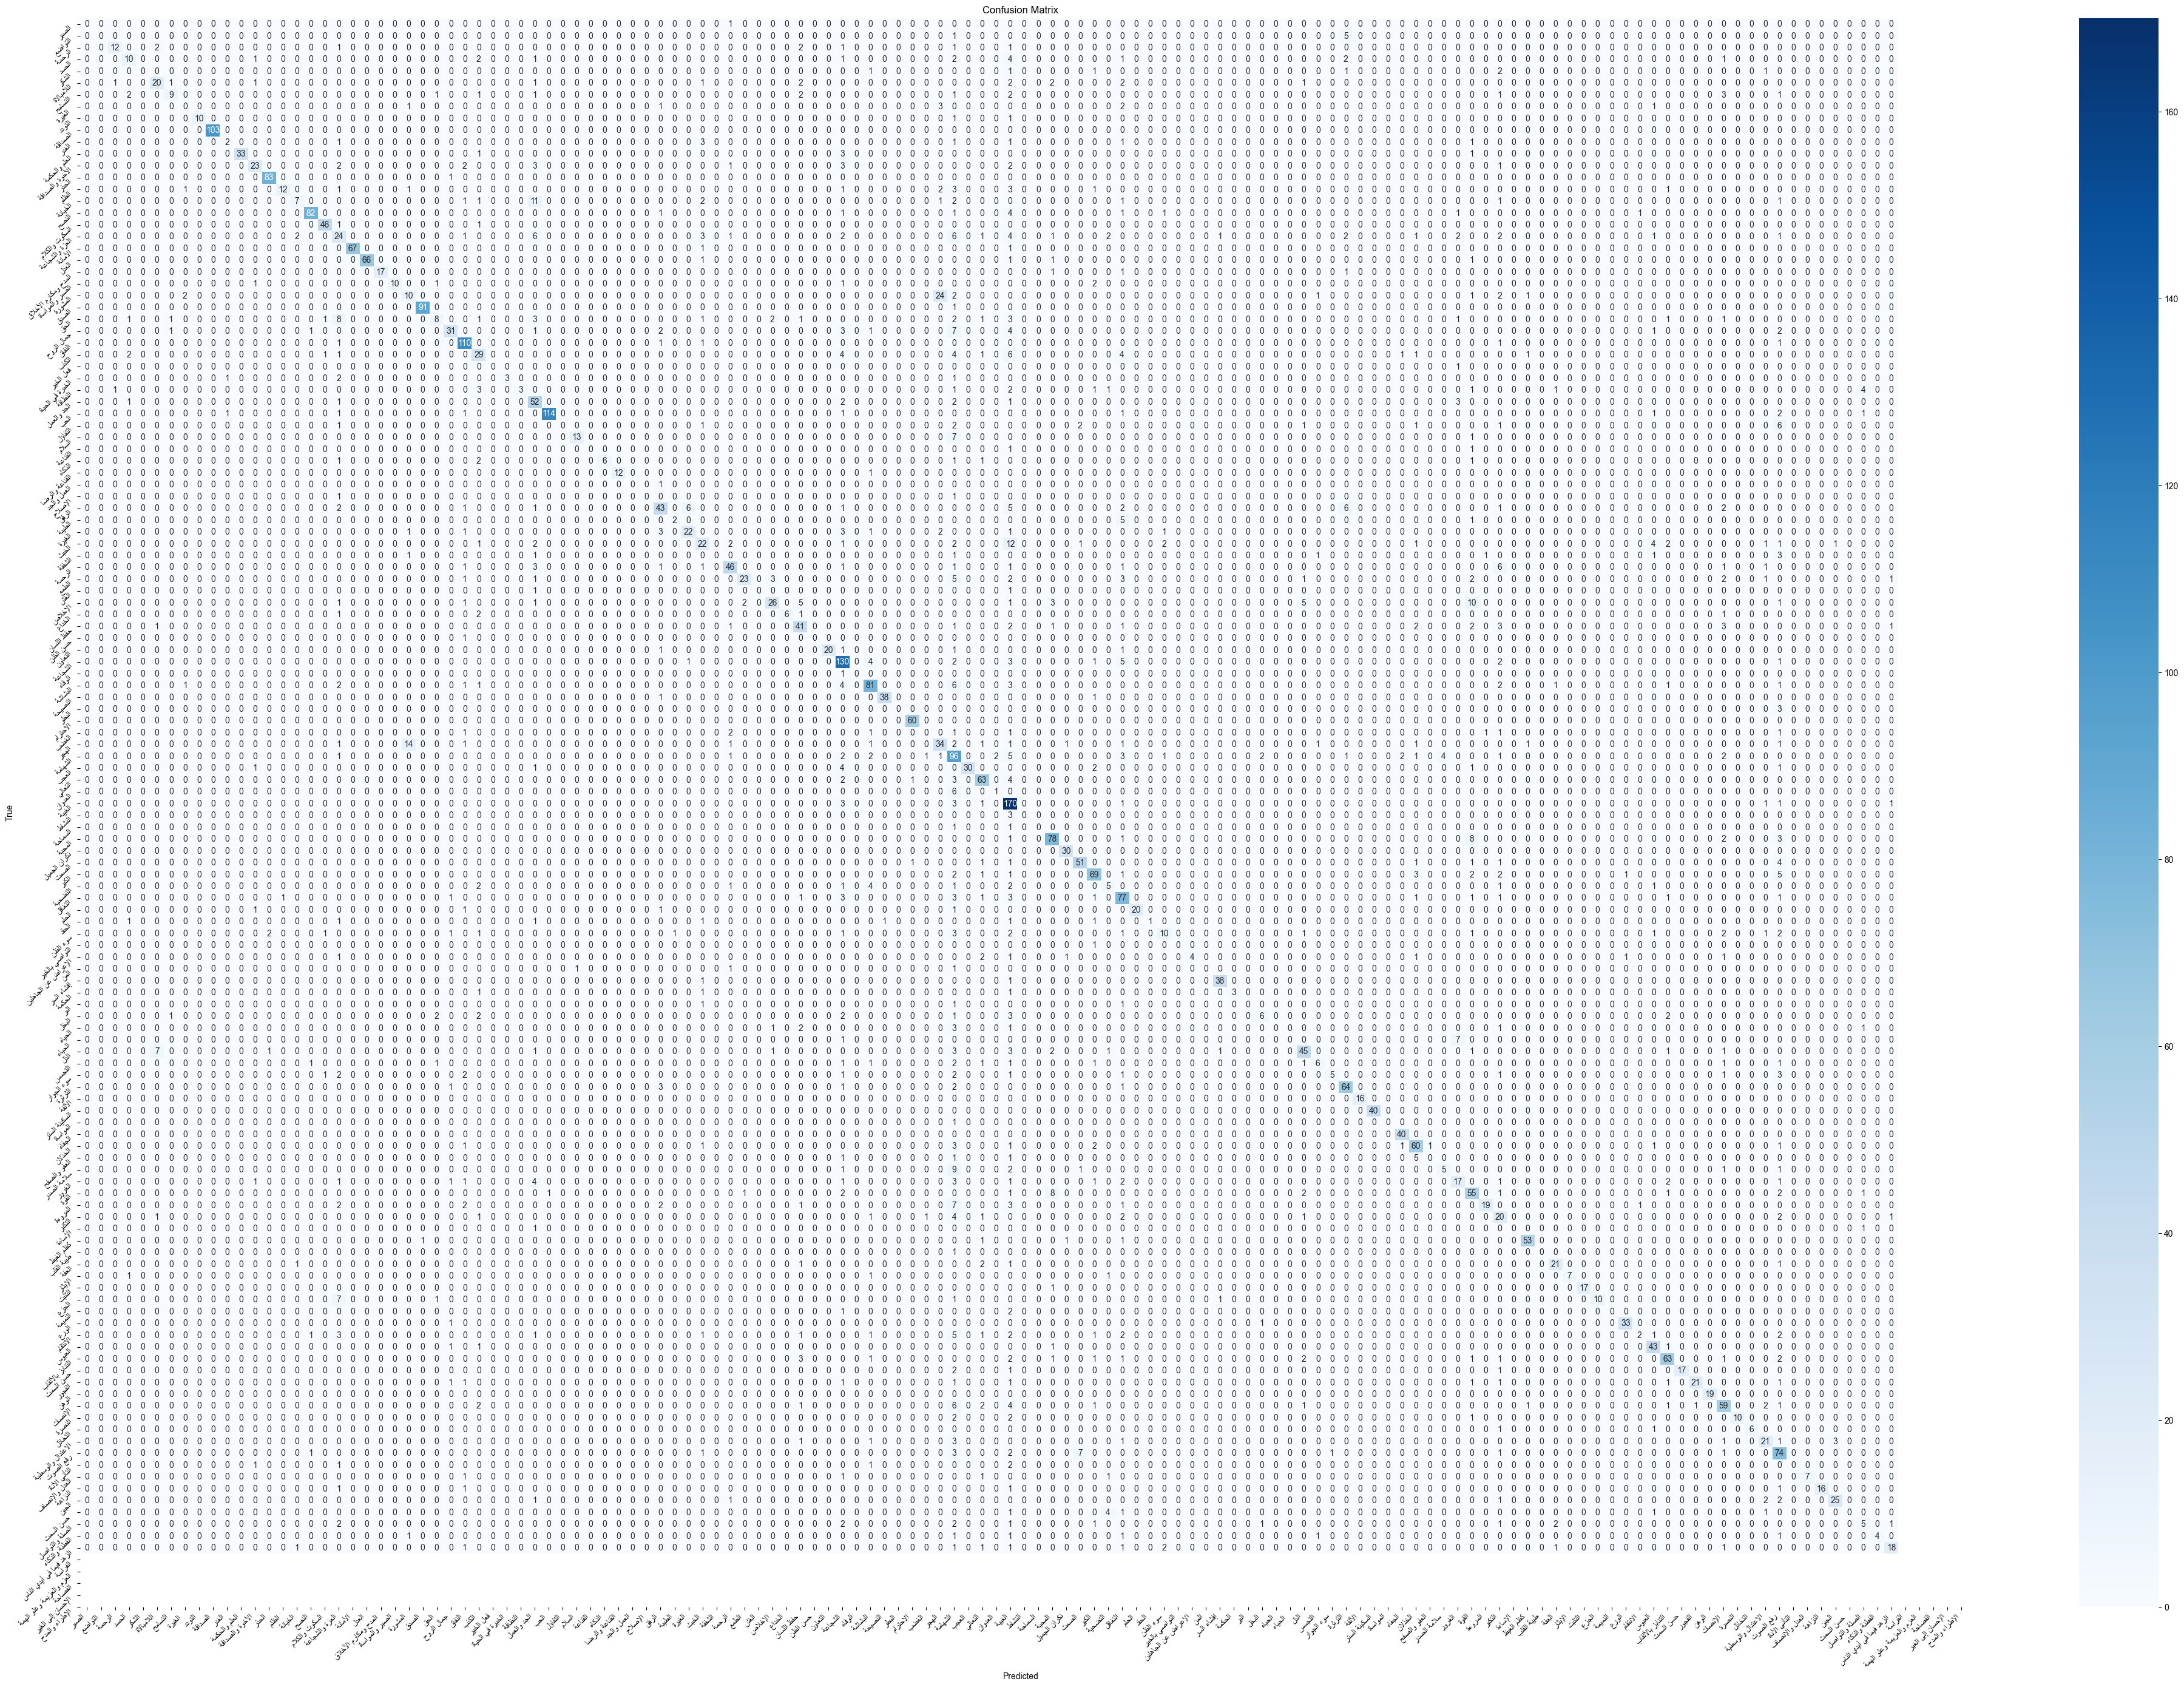

In [23]:
plt.rcParams['font.family'] = 'Arial'  # Set the font to DejaVu Sans

plt.figure(figsize=(50,34))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[get_display(arabic_reshaper.reshape(label)) for label in data['Category'].unique()], 
            yticklabels=[get_display(arabic_reshaper.reshape(label)) for label in data['Category'].unique()])

# Set Arabic font for the labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [20]:
# Save the model and vectorizer for later use
import joblib

In [21]:
joblib.dump(log_reg_model, 'log_reg_model.pkl')
joblib.dump(tfidf_vectorizer, 'log_reg_model_tfidf_vectorizer.pkl')

['log_reg_model_tfidf_vectorizer.pkl']

In [22]:
# Example prediction
example_sentence = ["إذا أردت أن تكون محبوباً، فأبدأ بابتسامة"]
example_tfidf = tfidf_vectorizer.transform(example_sentence)
predicted_category = log_reg_model.predict(example_tfidf)
print(f"Predicted Category: {predicted_category[0]}")

Predicted Category: الغيرة
